# Cosh Gaussian Model Illustration

In the context of modeling an eclipse,

- `alpha0`: median flux
- `alpha1`: negative eclipse depth, e.g., 10% depth means `-0.1`
- `t0`: eclipse midpoint, in normalized phase
- `d`, `Tau`: affects the eclipse duration and the shape of the eclipse (U-shaped vs V-shaped)
  - larger `d`: longer duration
  - larger `Tau`: more U-shaped

Varying d...


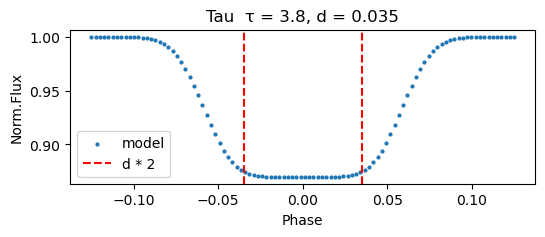

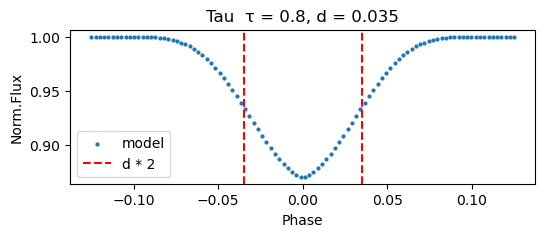

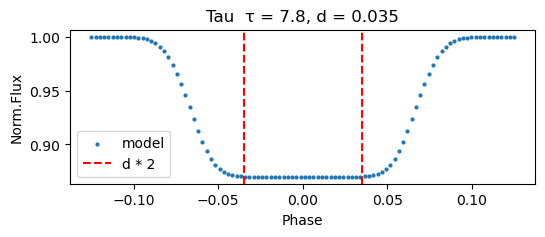

In [1]:
import numpy as np

from etv_functions import coshgauss_model_fit

from matplotlib import pyplot as plt

%matplotlib inline

# rough period: , depth primary: 15%,
# alpha0, alpha1, t0, d, Tau
# median flux, -eclipse depth, t0, related to duration, related to shape (U or V)
# t0 in normalixed phase
alpha0, alpha1, t0, d, Tau = 1, -0.13, 0.0, 0.035, 3.8
plot_zoom_factor = 0.25  # width of the plot in normalized phase
figsize = (6, 2)

x = np.linspace(t0 - 1 * plot_zoom_factor / 2, t0 + 1 * plot_zoom_factor / 2, 100)  # in normalized phase


print("Varying d...")

model_y = coshgauss_model_fit(x, alpha0, alpha1, t0, d, Tau)
ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - d, c="red", linestyle="--");
ax.axvline(t0 + d, c="red", linestyle="--", label="d * 2");
ax.legend();
ax.set_title(f"Tau  τ = {Tau}, d = {d}");

Tau = 0.8
model_y = coshgauss_model_fit(x, alpha0, alpha1, t0, d, Tau)
ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - d, c="red", linestyle="--");
ax.axvline(t0 + d, c="red", linestyle="--", label="d * 2");
ax.legend();
ax.set_title(f"Tau  τ = {Tau}, d = {d}");

Tau = 7.8
model_y = coshgauss_model_fit(x, alpha0, alpha1, t0, d, Tau)
ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - d, c="red", linestyle="--");
ax.axvline(t0 + d, c="red", linestyle="--", label="d * 2");
ax.legend();
ax.set_title(f"Tau  τ = {Tau}, d = {d}");

Varying d...


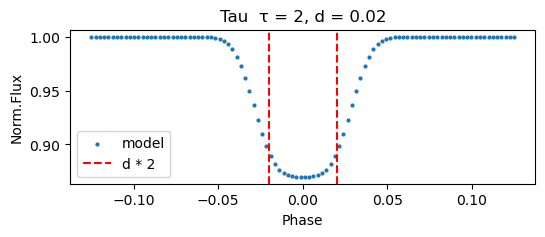

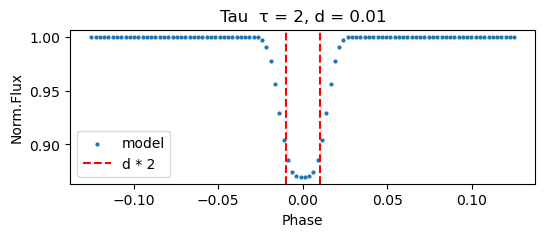

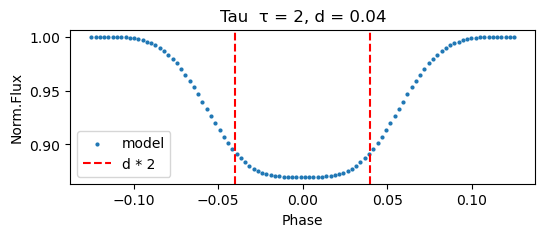

In [2]:
print("Varying d...")

Tau = 2

d = 0.02
model_y = coshgauss_model_fit(x, alpha0, alpha1, t0, d, Tau)
ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - d, c="red", linestyle="--");
ax.axvline(t0 + d, c="red", linestyle="--", label="d * 2");
ax.legend();
ax.set_title(f"Tau  τ = {Tau}, d = {d}");

d = 0.01
model_y = coshgauss_model_fit(x, alpha0, alpha1, t0, d, Tau)
ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - d, c="red", linestyle="--");
ax.axvline(t0 + d, c="red", linestyle="--", label="d * 2");
ax.legend();
ax.set_title(f"Tau  τ = {Tau}, d = {d}");

d = 0.04
model_y = coshgauss_model_fit(x, alpha0, alpha1, t0, d, Tau)
ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - d, c="red", linestyle="--");
ax.axvline(t0 + d, c="red", linestyle="--", label="d * 2");
ax.legend();
ax.set_title(f"Tau  τ = {Tau}, d = {d}");

# Contrast with Guassian Model

- Contrast with the gaussian term in a Two-Gaussian model
- In Gaussina model, one has less control on the shape of the eclipse.
- One can't really control the bell curve shape much, outside of its width via sigma. 
- one could possibly influence the shape to some extent indirectly
  -  by using `sigma`, `alpha0`, and, `alpha1` (if one gives up using `alpha1` to exclusively model eclipse depth, `alpha0` for median out of eclipse flux)
  - sacrifice model precision for out of eclipse portion (as `alpha0` and  `alpha1` would have been stolen)

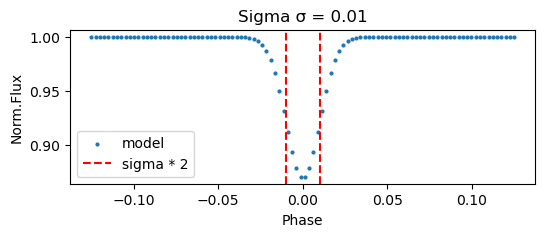

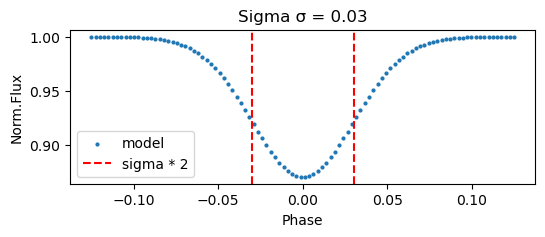

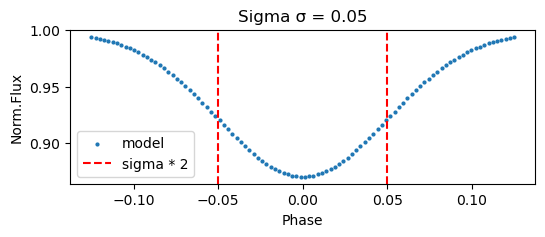

In [3]:
def gauss_model_fit(x, alpha0, alpha1, t0, sigma):
    # use the notation of eq 1 of Two-Gaussian model in section 2.1 of:
    # https://www.aanda.org/articles/aa/full_html/2017/10/aa30613-17/aa30613-17.html
    phi = x
    d = alpha1
    mu = t0
    C = alpha0  # the constant term not shown in eq1
    return C + d * np.exp(-((phi - mu) ** 2 / (2 * sigma ** 2)))



sigma = 0.01
model_y = gauss_model_fit(x, alpha0, alpha1, t0, sigma)

ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - sigma, c="red", linestyle="--");
ax.axvline(t0 + sigma, c="red", linestyle="--", label="sigma * 2");
ax.legend();
ax.set_title(f"Sigma σ = {sigma}");


sigma = 0.03
model_y = gauss_model_fit(x, alpha0, alpha1, t0, sigma)

ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - sigma, c="red", linestyle="--");
ax.axvline(t0 + sigma, c="red", linestyle="--", label="sigma * 2");
ax.legend();
ax.set_title(f"Sigma σ = {sigma}");


sigma = 0.05
model_y = gauss_model_fit(x, alpha0, alpha1, t0, sigma)

ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - sigma, c="red", linestyle="--");
ax.axvline(t0 + sigma, c="red", linestyle="--", label="sigma * 2");
ax.legend();
ax.set_title(f"Sigma σ = {sigma}");

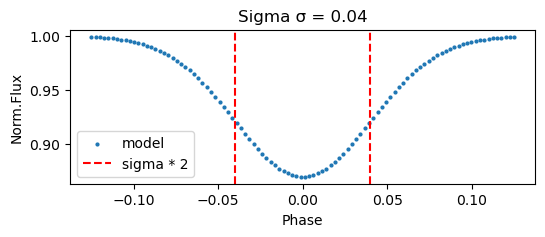

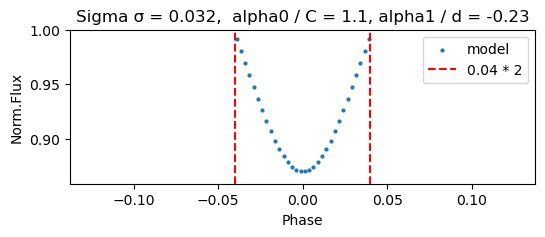

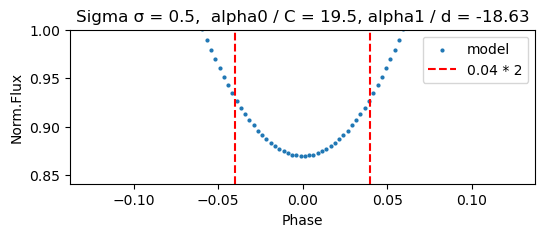

In [4]:
sigma = 0.04
model_y = gauss_model_fit(x, alpha0, alpha1, t0, sigma)

ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - sigma, c="red", linestyle="--");
ax.axvline(t0 + sigma, c="red", linestyle="--", label="sigma * 2");
ax.legend();
ax.set_title(f"Sigma σ = {sigma}");

sigma, tmp_alpha0, tmp_alpha1 = 0.032, 1.1, -0.23
model_y = gauss_model_fit(x, tmp_alpha0, tmp_alpha1, t0, sigma)

ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - 0.04, c="red", linestyle="--");
ax.axvline(t0 + 0.04, c="red", linestyle="--", label="0.04 * 2");
ax.legend();
ax.set_ylim(None, 1);
ax.set_title(f"Sigma σ = {sigma},  alpha0 / C = {tmp_alpha0}, alpha1 / d = {tmp_alpha1}");


sigma, tmp_alpha0, tmp_alpha1 = 0.5, 19.5, -18.63
model_y = gauss_model_fit(x, tmp_alpha0, tmp_alpha1, t0, sigma)

ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm.Flux");
ax.axvline(t0 - 0.04, c="red", linestyle="--");
ax.axvline(t0 + 0.04, c="red", linestyle="--", label="0.04 * 2");
ax.legend();
ax.set_ylim(None, 1);
ax.set_title(f"Sigma σ = {sigma},  alpha0 / C = {tmp_alpha0}, alpha1 / d = {tmp_alpha1}");




# Trapezoid Model Fit

In [19]:
from astropy.modeling.functional_models import Trapezoid1D

def trapezoid_model_fit(x, val_constant, amplitude, t0, bottom_width, slope):
    return val_constant -Trapezoid1D.evaluate(x, amplitude, t0, bottom_width, slope)


val_constant, amplitude, bottom_width, slope = 1, 0.1, 0.1, 5
model_y = trapezoid_model_fit(x, val_constant, amplitude, t0, bottom_width, slope)

ax = plt.figure(figsize=figsize).gca()
ax.scatter(x, model_y, s=4, label="model")
ax.set_xlabel("Phase");
ax.set_ylabel("Norm. Flux");
# ax.axvline(t0 - sigma, c="red", linestyle="--");
# ax.axvline(t0 + sigma, c="red", linestyle="--", label="sigma * 2");
ax.legend();



TypeError: trapezoid_model_fit() missing 1 required positional argument: 'slope'

In [18]:
foo = dict(a=1, b=2)
foo.keys()
foo.values()

dict_values([1, 2])